In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# NASDAQ 100 Index; Index; D; NSA; 2019-01-10 => Daily - not seasonally adjusted 
tr_path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/NASDAQ100.csv'
df_nas = pd.read_csv(tr_path)

# Dow Jones Composite Average; Index; D; NSA; 2019-01-10
path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/DJCA.csv'
df_dow = pd.read_csv(path)

wtr = pd.read_csv('/Users/Stellarhardwood/Downloads/weather-data-in-new-york-city-2016/data.csv')

In [190]:
df_nas.describe()
df_nas['VALUE'].head(50).values

nas_vals = pd.Series(df_nas["VALUE"].values)
nas_dates = pd.Series(df_nas["DATE"].values)
nas_new = pd.to_numeric(nas_vals,errors='coerce')

df_nas2 = pd.DataFrame(nas_new, columns =['values'])
df_dates = pd.DataFrame(nas_dates,columns=['dates'])
df1 = df_nas2.dropna()
df_nasdaq = pd.concat([df_dates,df_nas2],axis=1).dropna()
df_nasdaq.describe()

,values
count,8325.000000
mean,1855.339977
std,1703.431156
min,128.430000
25%,386.020000
50%,1482.340000
75%,2464.620000
max,7660.180000


In [150]:
df_dow.describe()
df_dow['VALUE'].head(26).values
# noticing theres values with '.'
# need to clean this up 

array(['2976.17', '2948.09', '2856.88', '2876.05', '2895.41', '.',
       '2775.04', '2857.44', '2830.25', '2805.81', '2829.37', '2856.59',
       '2927.47', '2858.60', '2798.52', '2776.47', '2839.01', '2814.37',
       '2853.37', '2935.88', '2927.73', '2800.19', '2798.48', '2787.05',
       '2762.98', '.'], dtype=object)

In [191]:
s = pd.Series(df_dow["VALUE"].values)
d = pd.Series(df_dow['DATE'].values)
# Make strings float 
s_new = pd.to_numeric(s,errors='coerce')
# Create dframe
df_s = pd.DataFrame(s_new, columns=['value'])
# Drop misc values 
dfs = df_s.dropna()
# Create dframe for dates 
dfd = pd.DataFrame(d,columns=['dates'])
new = pd.concat([dfd,dfs],axis=1)
df_dows = new.dropna()
df_dows # 2515 rows × 2 columns
df_dows.describe()

,value
count,2515.000000
mean,5470.974823
std,1631.360867
min,2195.300000
25%,4147.435000
50%,5510.540000
75%,6428.625000
max,8909.810000


In [199]:
# data only avialable from 1-1-2016 to 12-1-2016 
# need to trim stock data 
df_wtr = pd.DataFrame(wtr)
df_wtr.describe()

,maximum temperature,minimum temperature,average temperature
count,366.000000,366.000000,366.000000
mean,64.625683,49.806011,57.215847
std,18.041787,16.570747,17.124760
min,15.000000,-1.000000,7.000000
25%,50.000000,37.250000,44.000000
50%,64.500000,48.000000,55.750000
75%,81.000000,65.000000,73.500000
max,96.000000,81.000000,88.500000


Text(0, 0.5, 'Date')

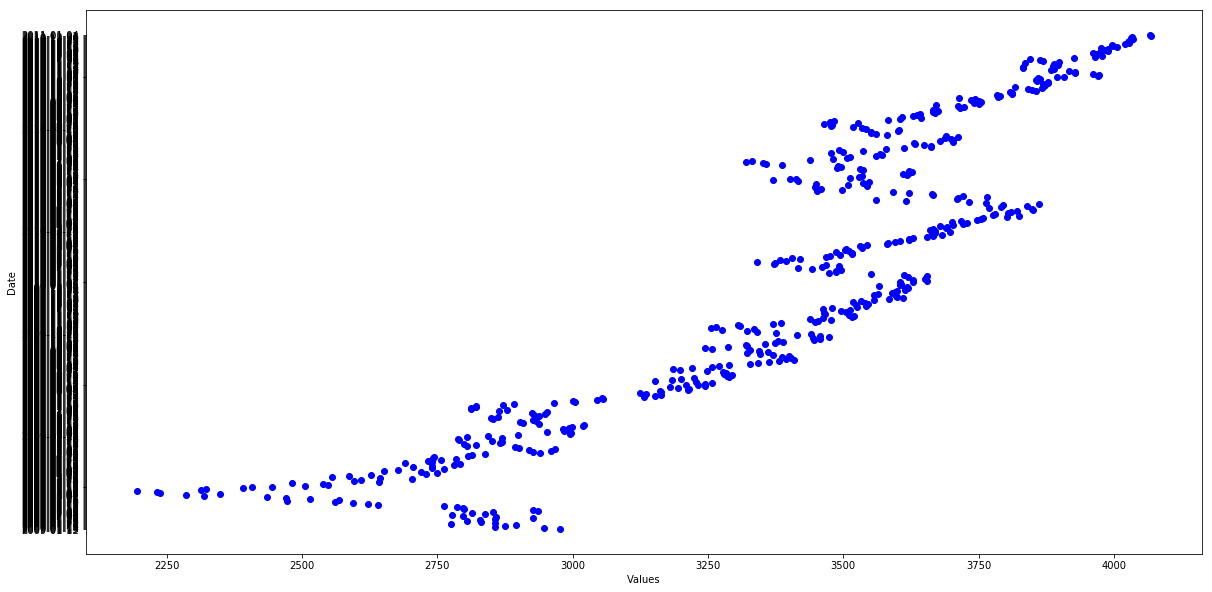

In [167]:
# Dow jones 
y= df_dows['dates'].head(500)
x= df_dows['value'].head(500)


plt.plot(x,y, 'bo')
#Add axis labels 
plt.xlabel("Values")
plt.ylabel("Date")



Text(0, 0.5, 'Date')

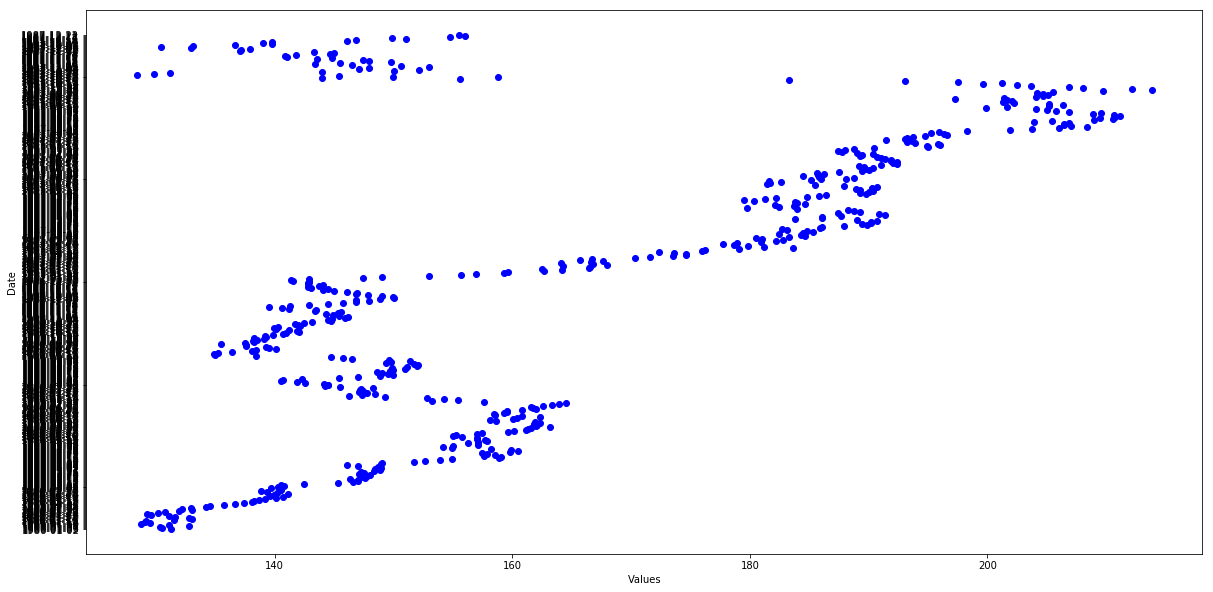

In [193]:
# NASDAQ 

y1= df_nasdaq['dates'].head(500)
x1= df_nasdaq['values'].head(500)


plt.plot(x1,y1, 'bo')
#Add axis labels 
plt.xlabel("Values")
plt.ylabel("Date")